In [80]:
import numpy as np
import pandas as pd
import itertools

from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns

from tqdm.notebook import tqdm_notebook as tqdm

from sklearn.svm import SVC


Pathbased Dataset


In [81]:
path = "/content/Pathbased.txt"
df1 = pd.read_csv(path, skiprows=7, delimiter="\t", names=['x', 'y', 'label'])
df1.head(50)

,x,y,label
0,11.25,5.05,1
1,10.95,4.70,1
2,9.85,5.80,1
3,9.80,5.75,1
4,9.15,6.80,1
5,8.65,6.60,1
6,8.40,7.50,1
7,7.90,7.75,1
8,6.95,8.70,1
9,7.25,9.75,1


In [82]:
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

In [83]:

scaler = StandardScaler()
scaler.fit(X)

X = scaler.transform(X)

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

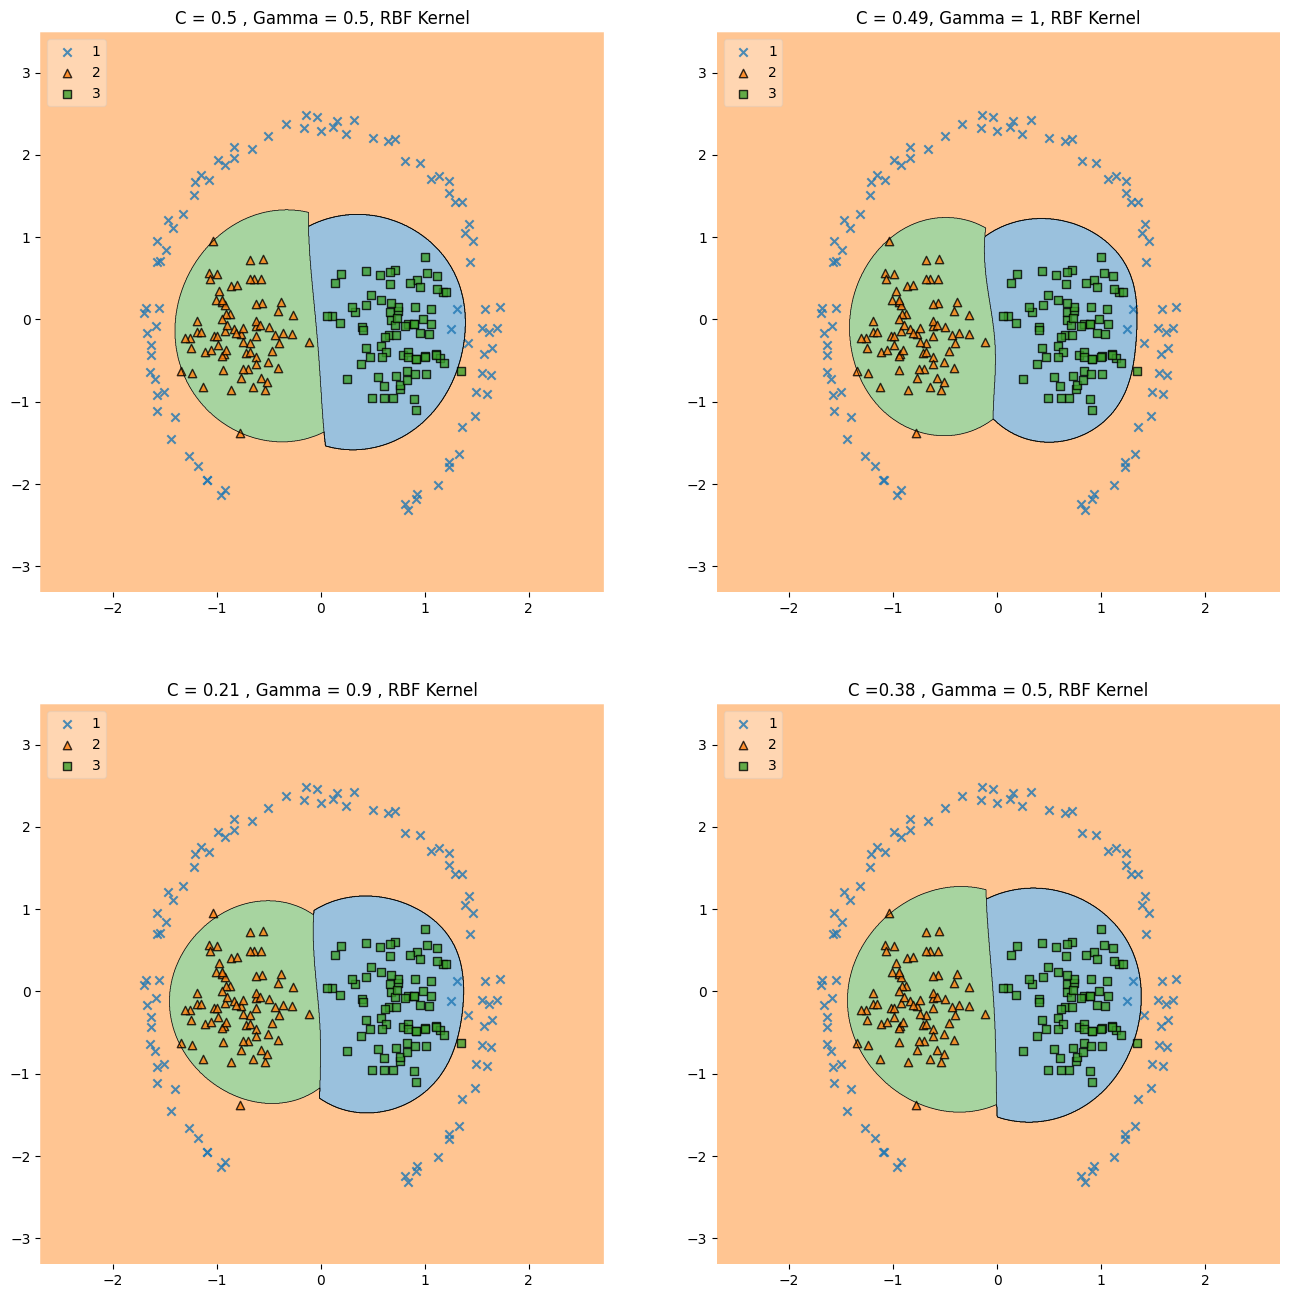

In [85]:

gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,16))
clf1 = SVC(C=0.5, kernel='rbf', gamma = 0.5)
clf2 = SVC(C=0.49, kernel='rbf', gamma = 1)
clf3 = SVC(C=0.21, kernel='rbf', gamma = 0.9)
clf4 = SVC(C=0.38, kernel='rbf', gamma = 0.5)



scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}

labels = ['C = 0.5 , Gamma = 0.5, RBF Kernel' , 'C = 0.49, Gamma = 1, RBF Kernel', 'C = 0.21 , Gamma = 0.9 , RBF Kernel'  ,'C =0.38 , Gamma = 0.5, RBF Kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()


In [86]:
from sklearn.metrics import accuracy_score

In [87]:

classifiers = [clf1, clf2, clf3, clf4]
labels = ['C = 0.5, Gamma = 0.5, RBF Kernel',
          'C = 0.49, Gamma = 1, RBF Kernel',
          'C = 0.21, Gamma = 0.9, RBF Kernel',
          'C = 0.38, Gamma = 0.5, RBF Kernel']

for clf, lab in zip(classifiers, labels):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    print("Accuracy for {}: {:.2f}%".format(lab, accuracy))


Accuracy for C = 0.5, Gamma = 0.5, RBF Kernel: 98.33%
Accuracy for C = 0.49, Gamma = 1, RBF Kernel: 98.33%
Accuracy for C = 0.21, Gamma = 0.9, RBF Kernel: 96.67%
Accuracy for C = 0.38, Gamma = 0.5, RBF Kernel: 96.67%


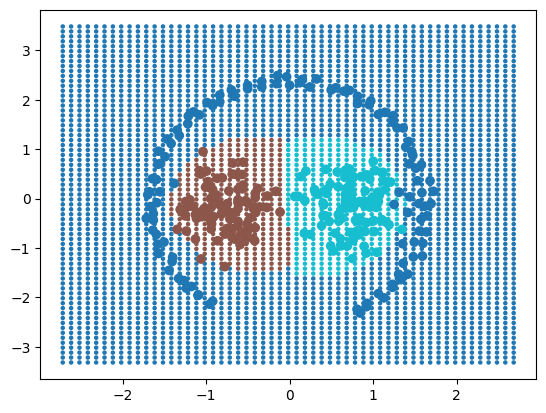

In [88]:

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(xx, yy, c=Z, s=5, cmap=plt.cm.tab10)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab10)
plt.show()

Jain Dataset


In [89]:
path = "/content/Jain.txt"
df1 = pd.read_csv(path, skiprows=7, delimiter="\t", names=['x', 'y', 'label'])
df1.head(50)

,x,y,label
0,0.85,17.45,2
1,0.75,15.60,2
2,3.30,15.45,2
3,5.25,14.20,2
4,4.90,15.65,2
5,5.35,15.85,2
6,5.10,17.90,2
7,4.60,18.25,2
8,4.05,18.75,2
9,3.40,19.70,2


In [90]:
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

In [91]:

scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [92]:
X = scaler.transform(X)


In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

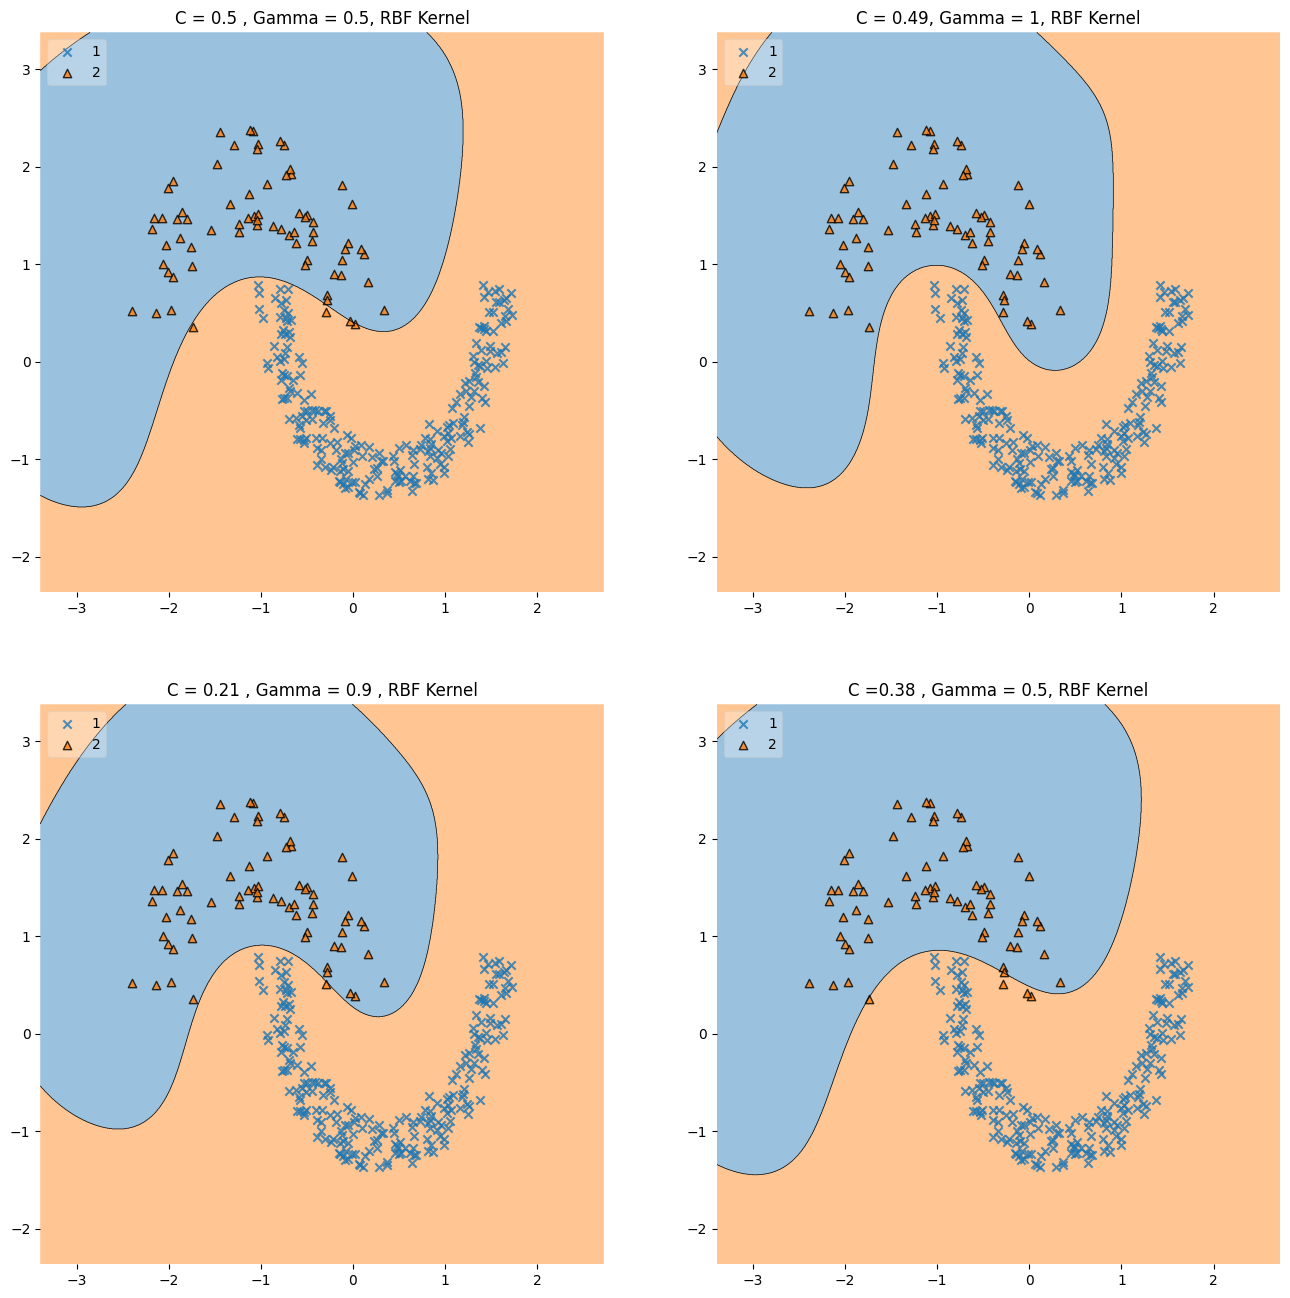

In [94]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,16))
clf1 = SVC(C=0.5, kernel='rbf', gamma = 0.5)
clf2 = SVC(C=0.49, kernel='rbf', gamma = 1)
clf3 = SVC(C=0.21, kernel='rbf', gamma = 0.9)
clf4 = SVC(C=0.38, kernel='rbf', gamma = 0.5)



scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}

labels = ['C = 0.5 , Gamma = 0.5, RBF Kernel' , 'C = 0.49, Gamma = 1, RBF Kernel', 'C = 0.21 , Gamma = 0.9 , RBF Kernel'  ,'C =0.38 , Gamma = 0.5, RBF Kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()


In [95]:
classifiers = [clf1, clf2, clf3, clf4]
labels = ['C = 0.5, Gamma = 0.5, RBF Kernel',
          'C = 0.49, Gamma = 1, RBF Kernel',
          'C = 0.21, Gamma = 0.9, RBF Kernel',
          'C = 0.38, Gamma = 0.5, RBF Kernel']

for clf, lab in zip(classifiers, labels):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    print("Accuracy for {}: {:.2f}%".format(lab, accuracy))


Accuracy for C = 0.5, Gamma = 0.5, RBF Kernel: 98.67%
Accuracy for C = 0.49, Gamma = 1, RBF Kernel: 100.00%
Accuracy for C = 0.21, Gamma = 0.9, RBF Kernel: 98.67%
Accuracy for C = 0.38, Gamma = 0.5, RBF Kernel: 97.33%


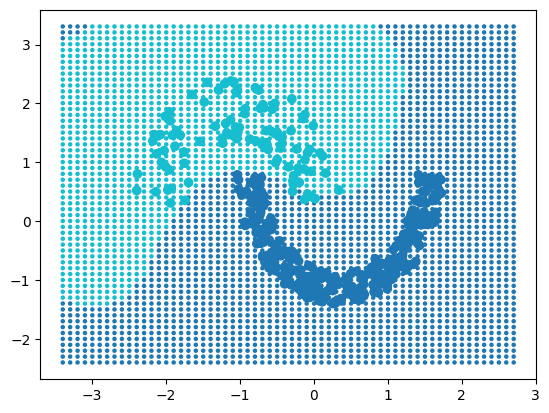

In [96]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(xx, yy, c=Z, s=5, cmap=plt.cm.tab10)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab10)
plt.show()


Aggregation Dataset

In [97]:
path = "/content/Aggregation.txt"
df1 = pd.read_csv(path, skiprows=7, delimiter="\t", names=['x', 'y', 'label'])
df1.head(50)

,x,y,label
0,15.55,28.65,2
1,14.90,27.55,2
2,14.45,28.35,2
3,14.15,28.80,2
4,13.75,28.05,2
5,13.35,28.45,2
6,13.00,29.15,2
7,13.45,27.50,2
8,13.60,26.50,2
9,12.80,27.35,2


In [98]:
X = scaler.transform(X)


In [99]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

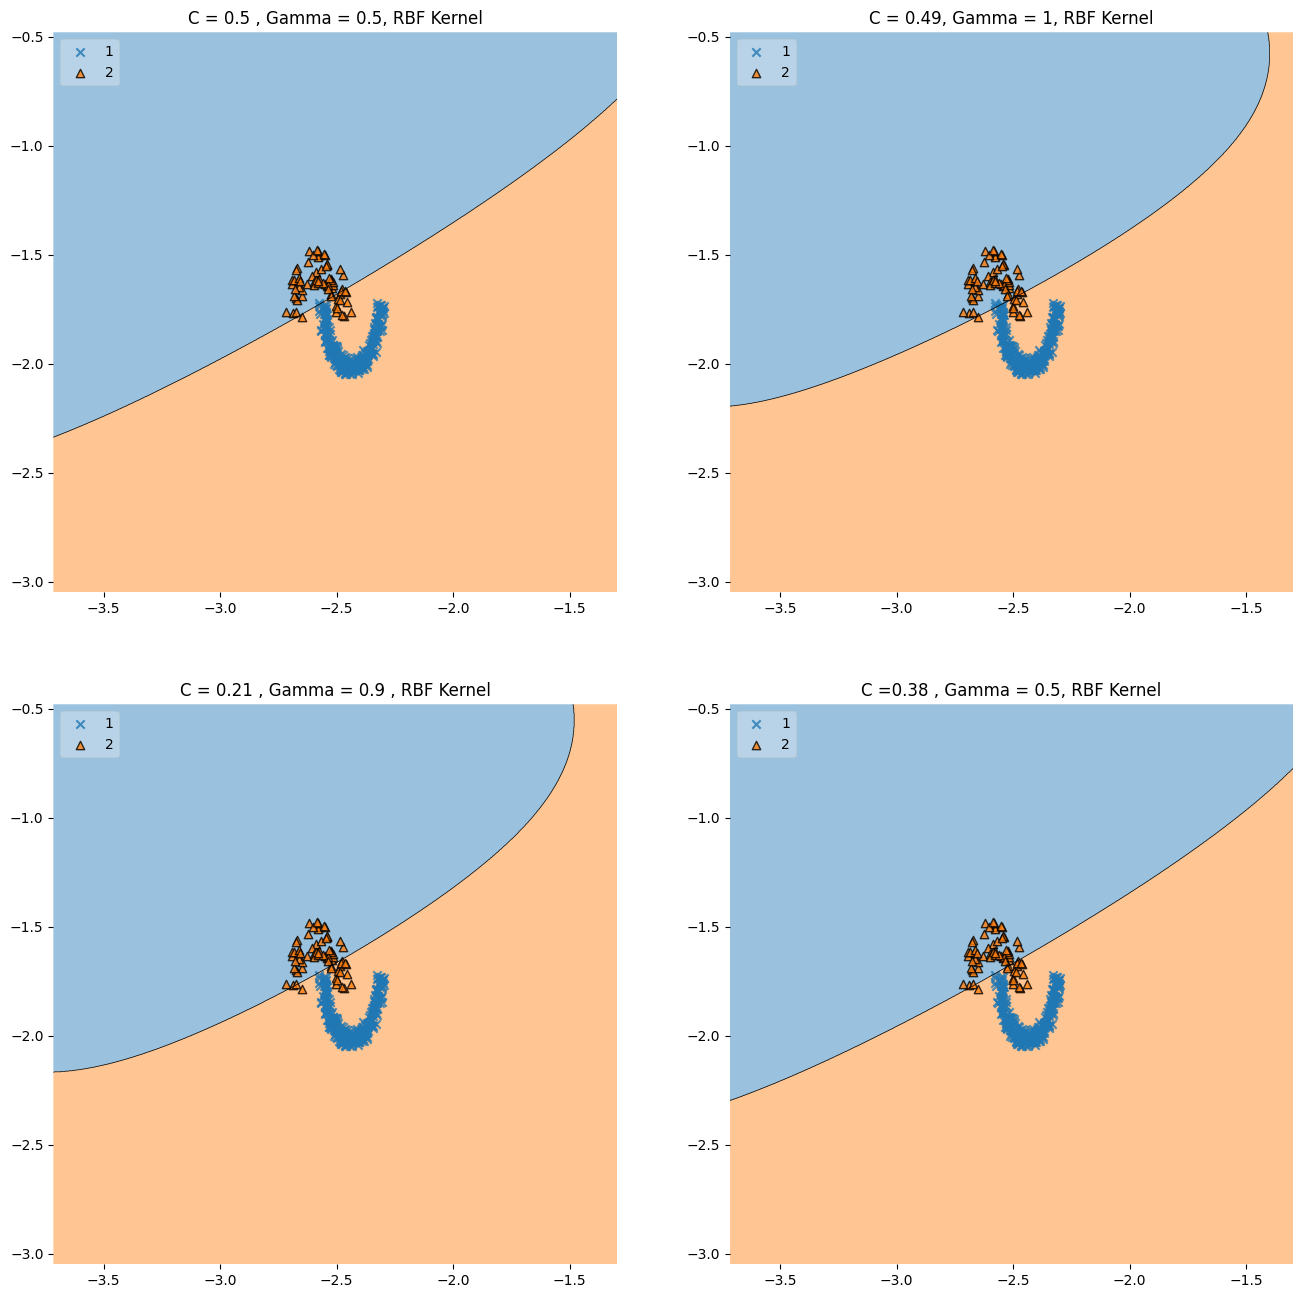

In [100]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,16))
clf1 = SVC(C=0.5, kernel='rbf', gamma = 0.5)
clf2 = SVC(C=0.49, kernel='rbf', gamma = 1)
clf3 = SVC(C=0.21, kernel='rbf', gamma = 0.9)
clf4 = SVC(C=0.38, kernel='rbf', gamma = 0.5)



scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}

labels = ['C = 0.5 , Gamma = 0.5, RBF Kernel' , 'C = 0.49, Gamma = 1, RBF Kernel', 'C = 0.21 , Gamma = 0.9 , RBF Kernel'  ,'C =0.38 , Gamma = 0.5, RBF Kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()

In [101]:
classifiers = [clf1, clf2, clf3, clf4]
labels = ['C = 0.5, Gamma = 0.5, RBF Kernel',
          'C = 0.49, Gamma = 1, RBF Kernel',
          'C = 0.21, Gamma = 0.9, RBF Kernel',
          'C = 0.38, Gamma = 0.5, RBF Kernel']

for clf, lab in zip(classifiers, labels):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    print("Accuracy for {}: {:.2f}%".format(lab, accuracy))


Accuracy for C = 0.5, Gamma = 0.5, RBF Kernel: 90.67%
Accuracy for C = 0.49, Gamma = 1, RBF Kernel: 92.00%
Accuracy for C = 0.21, Gamma = 0.9, RBF Kernel: 90.67%
Accuracy for C = 0.38, Gamma = 0.5, RBF Kernel: 90.67%


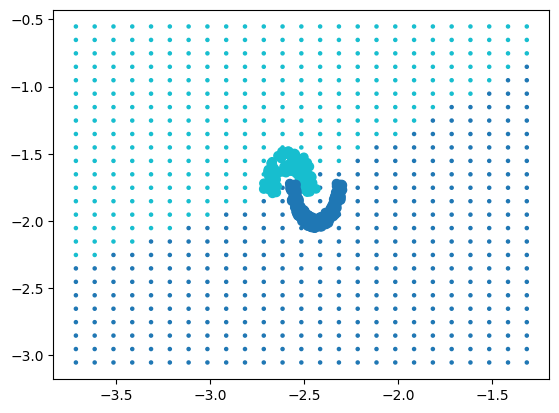

In [102]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(xx, yy, c=Z, s=5, cmap=plt.cm.tab10)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab10)
plt.show()

Flame Dataset

In [103]:
path = "/content/Flame.txt"
df1 = pd.read_csv(path, skiprows=7, delimiter="\t", names=['x', 'y', 'label'])
df1.head(50)

,x,y,label
0,1.85,27.80,1
1,1.35,26.65,1
2,1.40,23.25,2
3,0.85,23.05,2
4,0.50,22.35,2
5,0.65,21.35,2
6,1.10,22.05,2
7,1.35,22.65,2
8,1.95,22.80,2
9,2.40,22.45,2


In [104]:
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

In [105]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

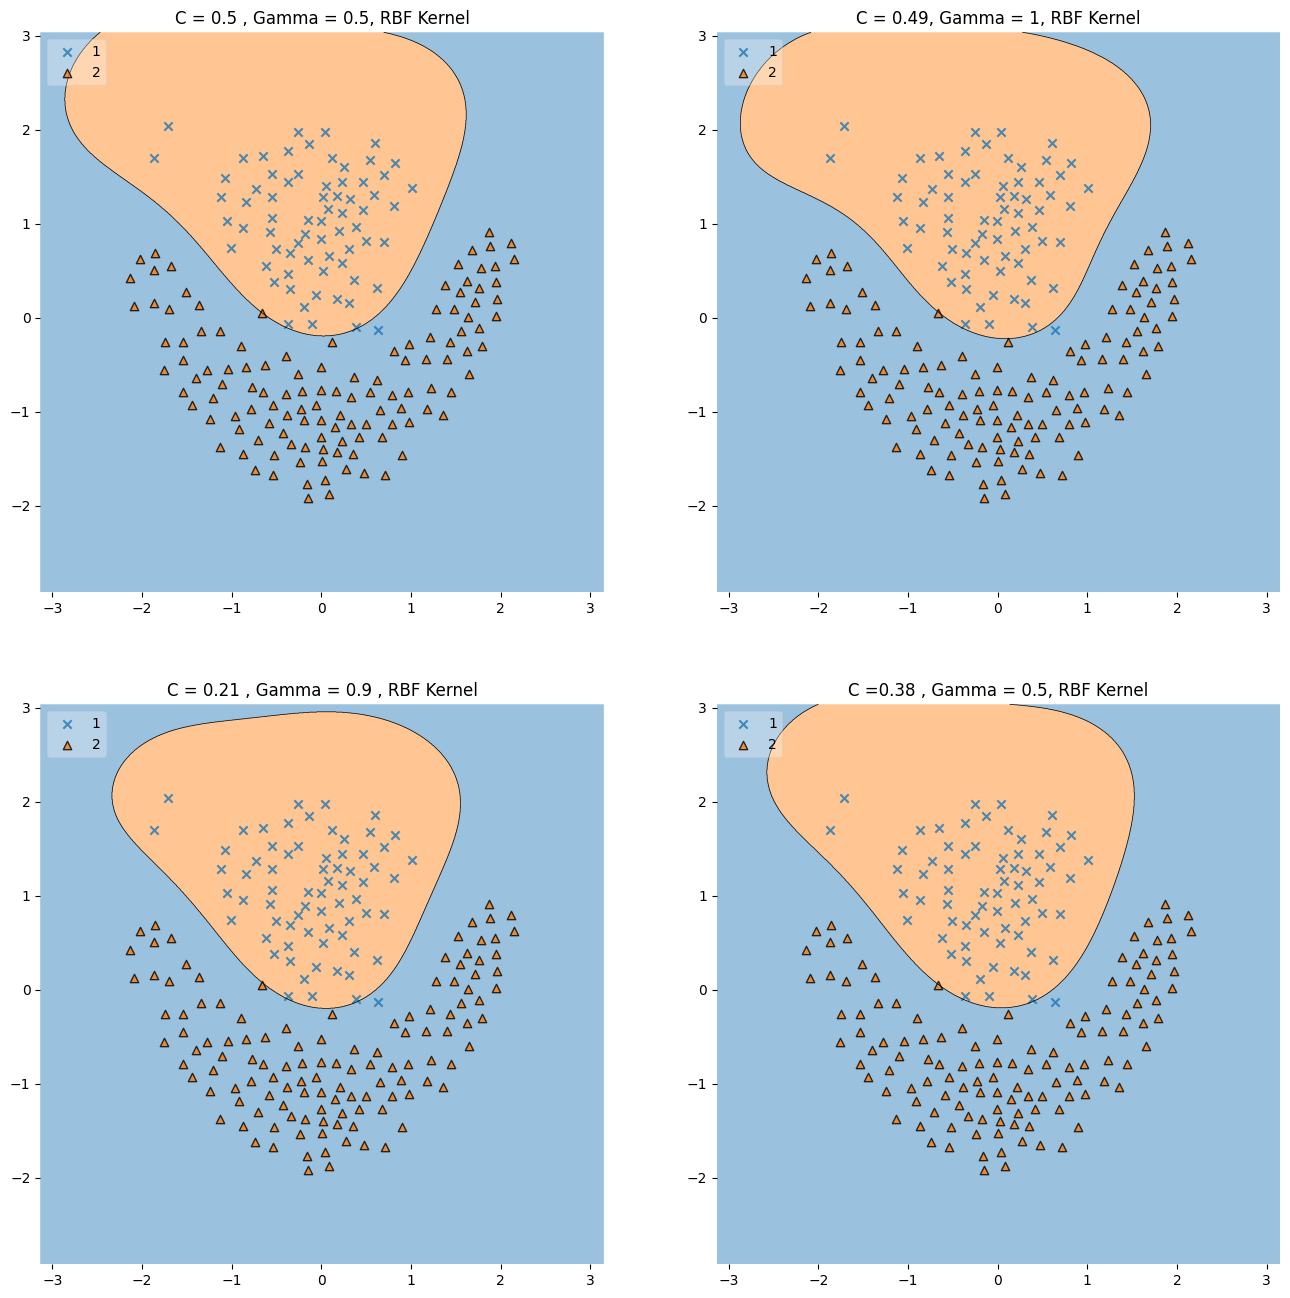

In [107]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,16))
clf1 = SVC(C=0.5, kernel='rbf', gamma = 0.5)
clf2 = SVC(C=0.49, kernel='rbf', gamma = 1)
clf3 = SVC(C=0.21, kernel='rbf', gamma = 0.9)
clf4 = SVC(C=0.38, kernel='rbf', gamma = 0.5)



scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}

labels = ['C = 0.5 , Gamma = 0.5, RBF Kernel' , 'C = 0.49, Gamma = 1, RBF Kernel', 'C = 0.21 , Gamma = 0.9 , RBF Kernel'  ,'C =0.38 , Gamma = 0.5, RBF Kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()

In [108]:
for clf, lab in zip(classifiers, labels):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    print("Accuracy for {}: {:.2f}%".format(lab, accuracy))



Accuracy for C = 0.5 , Gamma = 0.5, RBF Kernel: 100.00%
Accuracy for C = 0.49, Gamma = 1, RBF Kernel: 100.00%
Accuracy for C = 0.21 , Gamma = 0.9 , RBF Kernel: 100.00%
Accuracy for C =0.38 , Gamma = 0.5, RBF Kernel: 100.00%


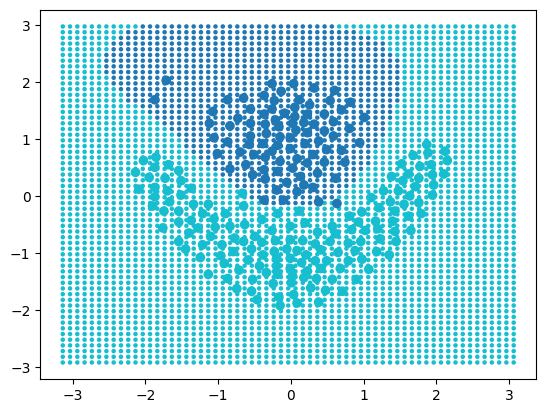

In [109]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(xx, yy, c=Z, s=5, cmap=plt.cm.tab10)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab10)
plt.show()

Compound Dataset

In [110]:
path = "/content/Compound.txt"
df1 = pd.read_csv(path, skiprows=7, delimiter="\t", names=['x', 'y', 'label'])
df1.head(50)

,x,y,label
0,26.75,22.15,1
1,29.80,22.15,1
2,31.55,21.10,1
3,27.70,20.85,1
4,29.90,19.95,1
5,26.80,19.05,1
6,28.35,18.25,1
7,30.40,17.85,1
8,27.25,16.70,1
9,29.05,16.00,1


In [111]:
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

In [112]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

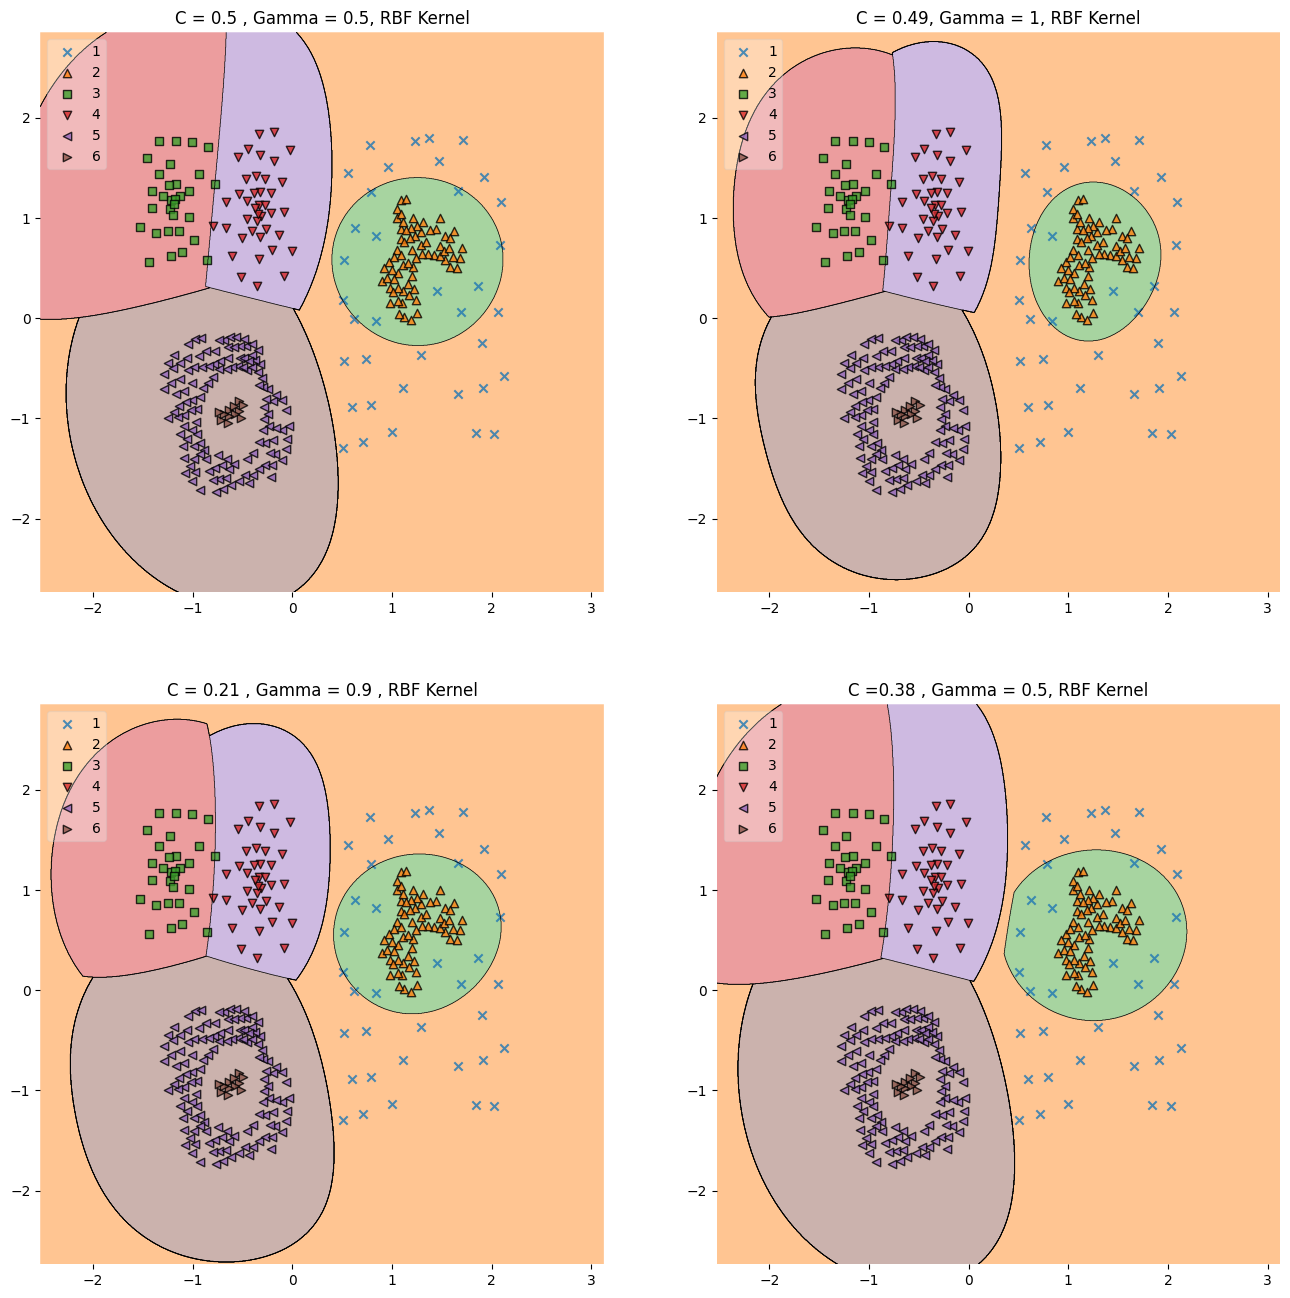

In [114]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,16))
clf1 = SVC(C=0.5, kernel='rbf', gamma = 0.5)
clf2 = SVC(C=0.49, kernel='rbf', gamma = 1)
clf3 = SVC(C=0.21, kernel='rbf', gamma = 0.9)
clf4 = SVC(C=0.38, kernel='rbf', gamma = 0.5)



scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}

labels = ['C = 0.5 , Gamma = 0.5, RBF Kernel' , 'C = 0.49, Gamma = 1, RBF Kernel', 'C = 0.21 , Gamma = 0.9 , RBF Kernel'  ,'C =0.38 , Gamma = 0.5, RBF Kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()

In [115]:
classifiers = [clf1, clf2, clf3, clf4]
labels = ['C = 0.5, Gamma = 0.5, RBF Kernel',
          'C = 0.49, Gamma = 1, RBF Kernel',
          'C = 0.21, Gamma = 0.9, RBF Kernel',
          'C = 0.38, Gamma = 0.5, RBF Kernel']

for clf, lab in zip(classifiers, labels):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    print("Accuracy for {}: {:.2f}%".format(lab, accuracy))

Accuracy for C = 0.5, Gamma = 0.5, RBF Kernel: 90.00%
Accuracy for C = 0.49, Gamma = 1, RBF Kernel: 91.25%
Accuracy for C = 0.21, Gamma = 0.9, RBF Kernel: 90.00%
Accuracy for C = 0.38, Gamma = 0.5, RBF Kernel: 90.00%


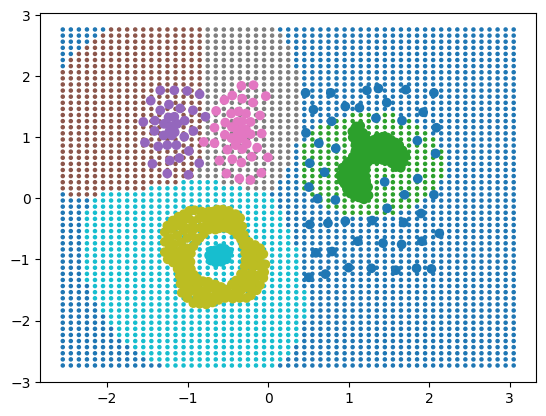

In [116]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(xx, yy, c=Z, s=5, cmap=plt.cm.tab10)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab10)
plt.show()


Spiral Dataset

In [117]:
path = "/content/Spiral.txt"
df1 = pd.read_csv(path, skiprows=7, delimiter="\t", names=['x', 'y', 'label'])
df1.head(50)

,x,y,label
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3
5,28.05,5.00,3
6,27.20,4.55,3
7,26.35,4.15,3
8,25.40,3.85,3
9,24.60,3.60,3


In [118]:
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values


In [119]:
scaler = StandardScaler()
scaler.fit(X)


StandardScaler()

In [120]:
X = scaler.transform(X)


In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(
/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('bl

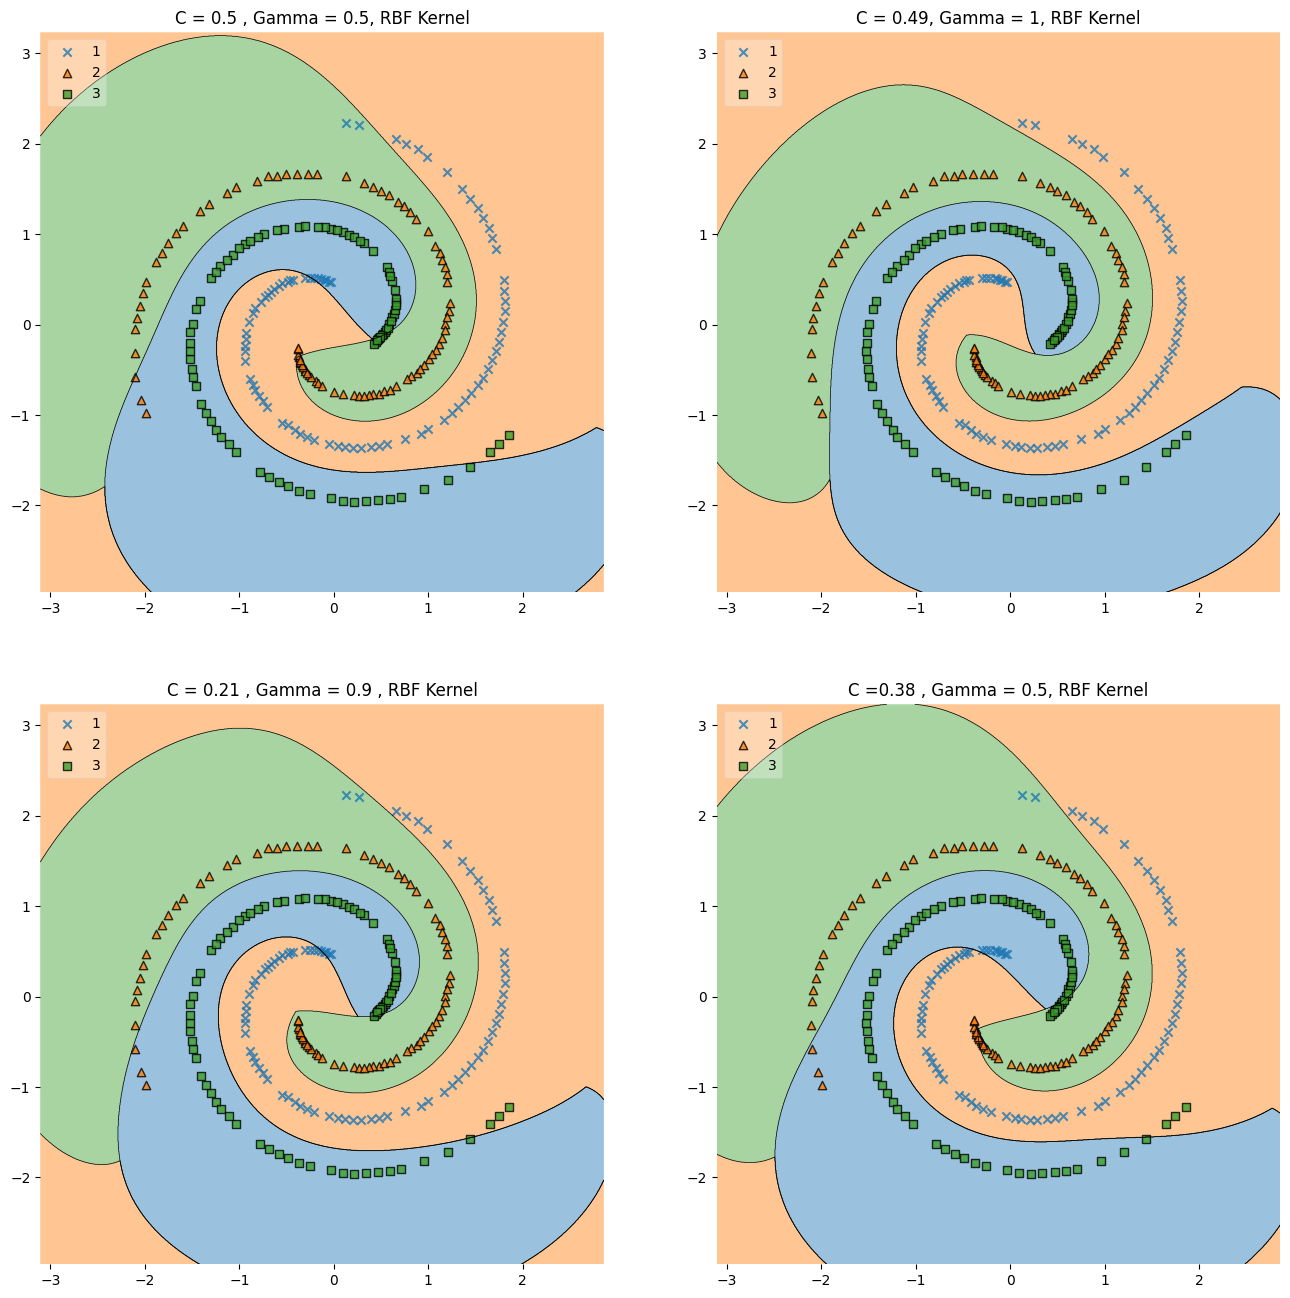

In [122]:
gs = gridspec.GridSpec(2, 2)

fig = plt.figure(figsize=(16,16))
clf1 = SVC(C=0.5, kernel='rbf', gamma = 0.5)
clf2 = SVC(C=0.49, kernel='rbf', gamma = 1)
clf3 = SVC(C=0.21, kernel='rbf', gamma = 0.9)
clf4 = SVC(C=0.38, kernel='rbf', gamma = 0.5)



scatter_highlight_kwargs = {'s': 50, 'label': 'Test data', 'alpha': 0.7, 'linestyle':'-'}

labels = ['C = 0.5 , Gamma = 0.5, RBF Kernel' , 'C = 0.49, Gamma = 1, RBF Kernel', 'C = 0.21 , Gamma = 0.9 , RBF Kernel'  ,'C =0.38 , Gamma = 0.5, RBF Kernel']
for clf, lab, grd in zip([clf1, clf2, clf3, clf4],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train, y=y_train, clf=clf, legend=2, markers='x^sv<>')
    plt.title(lab)

plt.show()

In [123]:

classifiers = [clf1, clf2, clf3, clf4]
labels = ['C = 0.5, Gamma = 0.5, RBF Kernel',
          'C = 0.49, Gamma = 1, RBF Kernel',
          'C = 0.21, Gamma = 0.9, RBF Kernel',
          'C = 0.38, Gamma = 0.5, RBF Kernel']

for clf, lab in zip(classifiers, labels):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    print("Accuracy for {}: {:.2f}%".format(lab, accuracy))


Accuracy for C = 0.5, Gamma = 0.5, RBF Kernel: 92.06%
Accuracy for C = 0.49, Gamma = 1, RBF Kernel: 100.00%
Accuracy for C = 0.21, Gamma = 0.9, RBF Kernel: 95.24%
Accuracy for C = 0.38, Gamma = 0.5, RBF Kernel: 90.48%


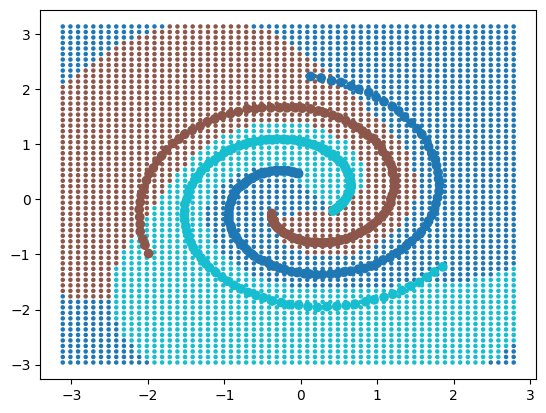

In [124]:

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.scatter(xx, yy, c=Z, s=5, cmap=plt.cm.tab10)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab10)
plt.show()